In [568]:
import csv
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import operator #need this for sorting dicts later
import matplotlib.cm as cm #for colormapping later
from matplotlib.colors import LogNorm
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [569]:
pubs_df = pd.read_csv('pubs.csv')
#not_restaurant_df = pd.read_csv('not_restaurant.csv')
pubs_df = pubs_df.drop(['city','Unnamed: 0'], 1)
#not_restaurant_df = not_restaurant_df.drop(['Unnamed: 0','city','distance'], 1)
final_df = pd.read_csv("table2.csv")
final_df = final_df.drop(['Unnamed: 0'], 1)
final_df.describe()

,density,mean_business_rating,rating
count,349.000000,346.000000,349.000000
mean,29.915201,3.749797,3.459885
std,23.738332,0.172239,0.602768
min,0.000000,3.000000,2.000000
25%,10.663381,3.670957,3.000000
50%,21.645072,3.716867,3.500000
75%,47.269018,3.860440,4.000000
max,82.283106,4.500000,4.500000


low density - everything <= 15 businesses
high density - everything >35

In [570]:
low_density_df = pd.DataFrame()
low_density_df = final_df.loc[final_df['density'] <= 30]
low_density_df.head()

,density,mean_business_rating,name,rating
0,5.888733,3.918919,McCarthy's Irish Pub,4.0
1,3.819719,3.895833,Boardwalk Place,3.0
2,8.912677,3.660714,The Yellow Griffin,3.0
3,9.071832,3.763158,Cabin Fever,4.5
4,18.143664,4.052632,Bar Homestand,3.5


In [571]:
high_density_df = pd.DataFrame()
high_density_df = final_df.loc[final_df['density'] > 30]
high_density_df.head()

,density,mean_business_rating,name,rating
5,37.242257,3.745726,The Red Room,3.0
7,72.574654,3.632675,The 3 Brewers,3.0
9,47.269018,3.698653,The Blake House,4.0
11,71.619724,3.618889,Duke of Richmond,3.5
12,47.269018,3.698653,The Blake House,4.0


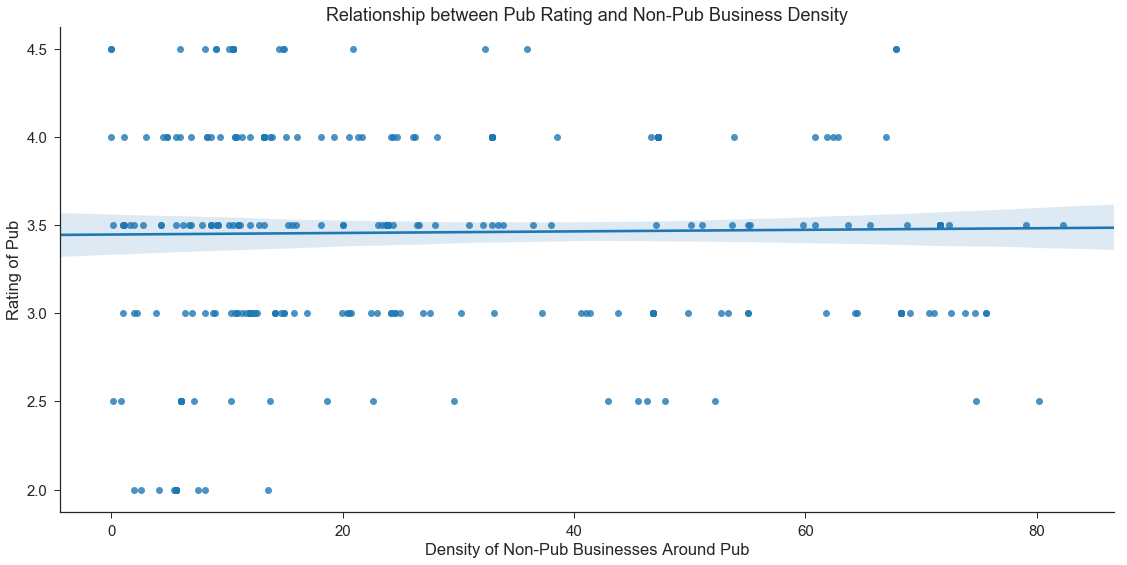

In [572]:
#Set style
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

# Plot Data
g = sns.lmplot(x="density", y="rating", size=8, data=final_df,aspect=2.0)

# Plot Labels
plt.title("Relationship between Pub Rating and Non-Pub Business Density")
plt.xlabel('Density of Non-Pub Businesses Around Pub')
plt.ylabel('Rating of Pub')

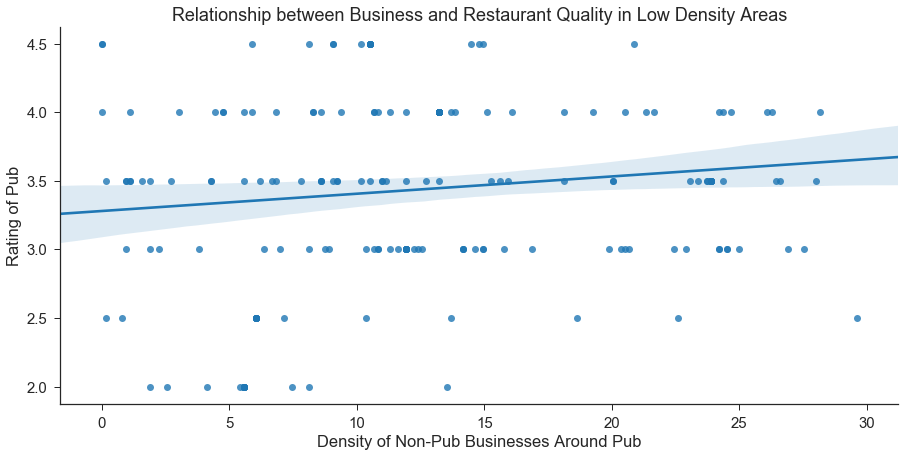

In [573]:
# Set style
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

#Plot
g = sns.lmplot(x="density", y="rating",size=6.5, data=low_density_df,aspect=2.0)

# Plot Labels
plt.title("Relationship between Business and Restaurant Quality in Low Density Areas")
plt.xlabel('Density of Non-Pub Businesses Around Pub')
plt.ylabel('Rating of Pub')

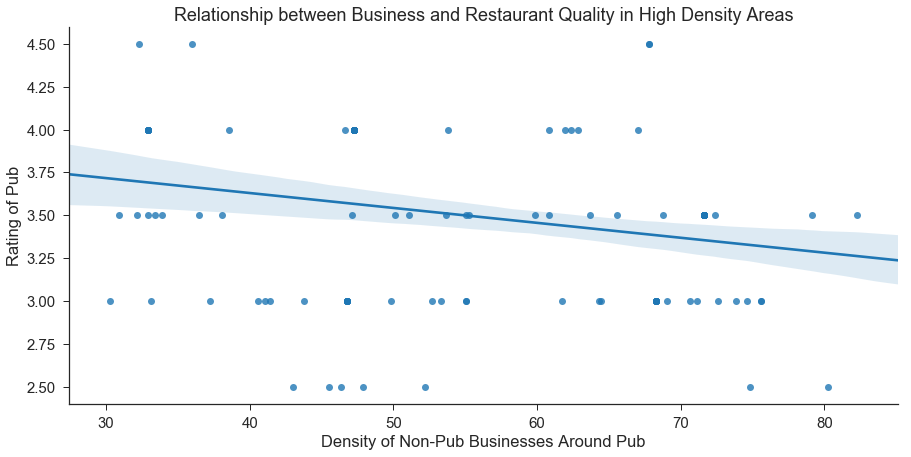

In [574]:
# Set Style
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

# Plot
g = sns.lmplot(x="density", y="rating",size=6.5, data=high_density_df, aspect=2.0)

# Plot labels
plt.title("Relationship between Business and Restaurant Quality in High Density Areas")
plt.xlabel('Density of Non-Pub Businesses Around Pub')
plt.ylabel('Rating of Pub')

In [575]:
#rating of pub vs rating of oher pubs.

In [576]:
#rating of pub quality vs rating non-pub density

In [577]:
pubs_df = pubs_df.drop_duplicates(subset=['name','postal_code','latitude','longitude','neighborhood'], keep=False)
pubs_df.describe()

,latitude,longitude,stars,review_count
count,203.000000,203.000000,203.000000,203.000000
mean,43.668998,-79.388099,3.391626,63.502463
std,0.032415,0.057959,0.580695,101.331891
min,43.599790,-79.603882,2.000000,3.000000
25%,43.650502,-79.414682,3.000000,16.500000
50%,43.660418,-79.390206,3.500000,33.000000
75%,43.673362,-79.363302,4.000000,71.500000
max,43.796148,-79.170583,4.500000,1087.000000


In [581]:
final_pubs = pd.DataFrame()

def haversine(x):
    
    global pubs_df
    global final_pubs
    
    # Initialize empty DataFrame
    df = pd.DataFrame()
    measure_1 = pd.DataFrame()
    
    print("our x df inside haversine func is", x)
    
    # Calculate the latitudes, longitudes:
    df['LAT_rad'], df['LON_rad'] = np.radians(pubs_df['latitude']), np.radians(pubs_df['longitude'])
    df['dLON'] = df['LON_rad'] - math.radians(x['longitude'])
    df['dLAT'] = df['LAT_rad'] - math.radians(x['latitude'])

    # Use Haversine's formula
    pubs_df['distance'] = 6367 * 2 * np.arcsin(np.sqrt(np.sin(df['dLAT']/2)**2 + math.cos(math.radians(37.2175900)) * np.cos(df['LAT_rad']) * np.sin(df['dLON']/2)**2))
   # print("4. pubs gets a new distace col", pubs_df)
    
    # Only consider pubs within a distance of 1 km of the chosen pub
    measure_1 = pubs_df
   # print("5. Another new dataframe is init, it equals pubs_df", measure_1)
    measure_1 = measure_1.loc[(pubs_df['distance'] > 0.0) & (pubs_df['distance'] <=1.0)]
    #print("6. Measure one is filtered", measure_1)
    
    # Calculate the mean rating of the surrounding pubs
    mean_rating = measure_1['stars'].mean()
   # print("mean biz rating is calc", mean_rating)
    #density = (measure_1['stars'].count())/ (2*math.pi*1.0*1.0)

    final_pubs = final_pubs.append({'name': x['name'].item(), 'rating': x['stars'].item(), 'mean_business_rating': mean_rating, "density": density}, ignore_index=True)
    return final_pubs


for line in pubs_df['name']:
    x = pubs_df.loc[pubs_df['name'] == line]
    print("The line of the DataFrame is", x)
    haversine(x)




The line of the DataFrame is                    name postal_code   latitude  longitude neighborhood  \
0  McCarthy's Irish Pub     M4L 2B5  43.678049 -79.314774  Upper Beach   

                                          categories  stars  review_count  \
0  [u'Pubs', u'Restaurants', u'Bars', u'Irish', u...    4.0             5   

   distance  
0  8.307149  
our x df inside haversine func is                    name postal_code   latitude  longitude neighborhood  \
0  McCarthy's Irish Pub     M4L 2B5  43.678049 -79.314774  Upper Beach   

                                          categories  stars  review_count  \
0  [u'Pubs', u'Restaurants', u'Bars', u'Irish', u...    4.0             5   

   distance  
0  8.307149  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0


The line of the DataFrame is               name postal_code  latitude  longitude neighborhood  \
1  Boardwalk Place     M4W 3L6  43.66301 -79.310898          NaN   

                                          categories  stars  review_count  \
1  [u'American (Traditional)', u'Restaurants', u'...    3.0            13   

   distance  
1  1.702905  
our x df inside haversine func is               name postal_code  latitude  longitude neighborhood  \
1  Boardwalk Place     M4W 3L6  43.66301 -79.310898          NaN   

                                          categories  stars  review_count  \
1  [u'American (Traditional)', u'Restaurants', u'...    3.0            13   

   distance  
1  1.702905  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0


The line of the DataFrame is                  name postal_code   latitude  longitude        neighborhood  \
2  The Yellow Griffin     M6S 1N4  43.651439 -79.475629  Bloor-West Village   

                                          categories  stars  review_count  \
2  [u'Pubs', u'Restaurants', u'Burgers', u'Nightl...    3.0            98   

   distance  
2  13.95484  
our x df inside haversine func is                  name postal_code   latitude  longitude        neighborhood  \
2  The Yellow Griffin     M6S 1N4  43.651439 -79.475629  Bloor-West Village   

                                          categories  stars  review_count  \
2  [u'Pubs', u'Restaurants', u'Burgers', u'Nightl...    3.0            98   

   distance  
2  13.95484  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0


The line of the DataFrame is           name postal_code  latitude  longitude neighborhood  \
3  Cabin Fever     M6P 1A6  43.65535 -79.456719    High Park   

                                          categories  stars  review_count  \
3  [u'Cafes', u'Art Galleries', u'Arts & Entertai...    4.5            26   

   distance  
3  1.653186  
our x df inside haversine func is           name postal_code  latitude  longitude neighborhood  \
3  Cabin Fever     M6P 1A6  43.65535 -79.456719    High Park   

                                          categories  stars  review_count  \
3  [u'Cafes', u'Art Galleries', u'Arts & Entertai...    4.5            26   

   distance  
3  1.653186  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5


The line of the DataFrame is             name postal_code  latitude  longitude   neighborhood  \
4  Bar Homestand     M6G 1M2   43.6626 -79.423726  Christie Pits   

                                          categories  stars  review_count  \
4  [u'Comfort Food', u'Pubs', u'Bars', u'Sports B...    3.5             5   

   distance  
4  2.897132  
our x df inside haversine func is             name postal_code  latitude  longitude   neighborhood  \
4  Bar Homestand     M6G 1M2   43.6626 -79.423726  Christie Pits   

                                          categories  stars  review_count  \
4  [u'Comfort Food', u'Pubs', u'Bars', u'Sports B...    3.5             5   

   distance  
4  2.897132  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5


The line of the DataFrame is            name postal_code  latitude  longitude neighborhood  \
5  The Red Room     M5T 2G8  43.65707 -79.400153    Chinatown   

                                          categories  stars  review_count  \
5  [u'Asian Fusion', u'Nightlife', u'Indian', u'P...    3.0           107   

   distance  
5   2.08112  
our x df inside haversine func is            name postal_code  latitude  longitude neighborhood  \
5  The Red Room     M5T 2G8  43.65707 -79.400153    Chinatown   

                                          categories  stars  review_count  \
5  [u'Asian Fusion', u'Nightlife', u'Indian', u'P...    3.0           107   

   distance  
5   2.08112  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0


The line of the DataFrame is          name postal_code   latitude  longitude         neighborhood  \
6  Scallywags     M4V 1K6  43.687766 -79.394541  Yonge and St. Clair   

                                         categories  stars  review_count  \
6  [u'Pubs', u'Restaurants', u'Nightlife', u'Bars']    3.0            63   

   distance  
6  3.443693  
our x df inside haversine func is          name postal_code   latitude  longitude         neighborhood  \
6  Scallywags     M4V 1K6  43.687766 -79.394541  Yonge and St. Clair   

                                         categories  stars  review_count  \
6  [u'Pubs', u'Restaurants', u'Nightlife', u'Bars']    3.0            63   

   distance  
6  3.443693  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0


The line of the DataFrame is             name postal_code   latitude  longitude   neighborhood  \
7  The 3 Brewers     M5B 1N8  43.655508 -79.380466  Downtown Core   

                                          categories  stars  review_count  \
7  [u'Restaurants', u'Nightlife', u'Bars', u'Pubs...    3.0           218   

   distance  
7  3.776096  
our x df inside haversine func is             name postal_code   latitude  longitude   neighborhood  \
7  The 3 Brewers     M5B 1N8  43.655508 -79.380466  Downtown Core   

                                          categories  stars  review_count  \
7  [u'Restaurants', u'Nightlife', u'Bars', u'Pubs...    3.0           218   

   distance  
7  3.776096  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0


The line of the DataFrame is                                   name postal_code   latitude  longitude  \
8  McSorley's Wonderful Saloon & Grill     M4G 3B6  43.704737 -79.375121   

                    neighborhood  \
8  Mount Pleasant and Davisville   

                                          categories  stars  review_count  \
8  [u'American (Traditional)', u'Bars', u'Restaur...    3.5            29   

   distance  
8  5.489055  
our x df inside haversine func is                                   name postal_code   latitude  longitude  \
8  McSorley's Wonderful Saloon & Grill     M4G 3B6  43.704737 -79.375121   

                    neighborhood  \
8  Mount Pleasant and Davisville   

                                          categories  stars  review_count  \
8  [u'American (Traditional)', u'Bars', u'Restaur...    3.5            29   

   distance  
8  5.489055  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5


The line of the DataFrame is             name postal_code   latitude  longitude  \
36  Duke of Kent     M4P 2C6  43.707933 -79.398269   

                     neighborhood  \
36  Mount Pleasant and Davisville   

                                           categories  stars  review_count  \
36  [u'Bars', u'Restaurants', u'Nightlife', u'Pubs...    3.5            84   

    distance  
36  1.983741  
our x df inside haversine func is             name postal_code   latitude  longitude  \
36  Duke of Kent     M4P 2C6  43.707933 -79.398269   

                     neighborhood  \
36  Mount Pleasant and Davisville   

                                           categories  stars  review_count  \
36  [u'Bars', u'Restaurants', u'Nightlife', u'Pubs...    3.5            84   

    distance  
36  1.983741  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                   name postal_code  latitude  longitude neighborhood  \
37  The Irv Gastro Pub         M5A  43.66354 -79.370583          NaN   

                                           categories  stars  review_count  \
37  [u'Burgers', u'Nightlife', u'Gastropubs', u'Pu...    4.5            67   

    distance  
37  5.457951  
our x df inside haversine func is                   name postal_code  latitude  longitude neighborhood  \
37  The Irv Gastro Pub         M5A  43.66354 -79.370583          NaN   

                                           categories  stars  review_count  \
37  [u'Burgers', u'Nightlife', u'Gastropubs', u'Pu...    4.5            67   

    distance  
37  5.457951  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is           name postal_code   latitude  longitude neighborhood  \
38  Fuel House     M6G 2Y3  43.655666 -79.413881   Palmerston   

                                           categories  stars  review_count  \
38  [u'Nightlife', u'Sandwiches', u'Bars', u'Resta...    4.0            14   

    distance  
38  3.755552  
our x df inside haversine func is           name postal_code   latitude  longitude neighborhood  \
38  Fuel House     M6G 2Y3  43.655666 -79.413881   Palmerston   

                                           categories  stars  review_count  \
38  [u'Nightlife', u'Sandwiches', u'Bars', u'Resta...    4.0            14   

    distance  
38  3.755552  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is          name postal_code   latitude  longitude neighborhood  \
39  The Oxley     M5R 1C4  43.670717 -79.393126    Yorkville   

                                           categories  stars  review_count  \
39  [u'Pubs', u'Nightlife', u'British', u'Bars', u...    4.0            91   

    distance  
39  2.421027  
our x df inside haversine func is          name postal_code   latitude  longitude neighborhood  \
39  The Oxley     M5R 1C4  43.670717 -79.393126    Yorkville   

                                           categories  stars  review_count  \
39  [u'Pubs', u'Nightlife', u'British', u'Bars', u...    4.0            91   

    distance  
39  2.421027  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                               name postal_code   latitude  longitude  \
67  The Pour House Pub And Kitchen     M5R 2E6  43.675708 -79.403853   

   neighborhood                                         categories  stars  \
67    The Annex  [u'Nightlife', u'Bars', u'Canadian (New)', u'R...    3.0   

    review_count  distance  
67            83  1.061163  
our x df inside haversine func is                               name postal_code   latitude  longitude  \
67  The Pour House Pub And Kitchen     M5R 2E6  43.675708 -79.403853   

   neighborhood                                         categories  stars  \
67    The Annex  [u'Nightlife', u'Bars', u'Canadian (New)', u'R...    3.0   

    review_count  distance  
67            83  1.061163  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                         name postal_code   latitude  longitude neighborhood  \
68  Dominion Pub and Kitchen     M5A 1T7  43.656944 -79.359167     Corktown   

                                           categories  stars  review_count  \
68  [u'Nightlife', u'Music Venues', u'Restaurants'...    4.0            31   

    distance  
68  4.307528  
our x df inside haversine func is                         name postal_code   latitude  longitude neighborhood  \
68  Dominion Pub and Kitchen     M5A 1T7  43.656944 -79.359167     Corktown   

                                           categories  stars  review_count  \
68  [u'Nightlife', u'Music Venues', u'Restaurants'...    4.0            31   

    distance  
68  4.307528  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                       name postal_code   latitude  longitude   neighborhood  \
69  KINKA IZAKAYA ORIGINAL     M5B 2A2  43.660524 -79.378927  Downtown Core   

                                           categories  stars  review_count  \
69  [u'Pubs', u'Japanese', u'Restaurants', u'Bars'...    4.0          1087   

    distance  
69  1.713494  
our x df inside haversine func is                       name postal_code   latitude  longitude   neighborhood  \
69  KINKA IZAKAYA ORIGINAL     M5B 2A2  43.660524 -79.378927  Downtown Core   

                                           categories  stars  review_count  \
69  [u'Pubs', u'Japanese', u'Restaurants', u'Bars'...    4.0          1087   

    distance  
69  1.713494  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                name postal_code   latitude  longitude neighborhood  \
70  Snakes & Lagers     M6G 1A4  43.656257 -79.409585   Palmerston   

                                           categories  stars  review_count  \
70  [u'Pubs', u'Nightlife', u'Restaurants', u'Gast...    3.0            58   

    distance  
70  2.629152  
our x df inside haversine func is                name postal_code   latitude  longitude neighborhood  \
70  Snakes & Lagers     M6G 1A4  43.656257 -79.409585   Palmerston   

                                           categories  stars  review_count  \
70  [u'Pubs', u'Nightlife', u'Restaurants', u'Gast...    3.0            58   

    distance  
70  2.629152  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                                name postal_code   latitude  longitude  \
71  Madison Avenue Pub & Restaurant     M5R 2S1  43.667846 -79.403299   

   neighborhood                                         categories  stars  \
71    The Annex  [u'Restaurants', u'Bars', u'American (Traditio...    3.0   

    review_count  distance  
71           123  1.392772  
our x df inside haversine func is                                name postal_code   latitude  longitude  \
71  Madison Avenue Pub & Restaurant     M5R 2S1  43.667846 -79.403299   

   neighborhood                                         categories  stars  \
71    The Annex  [u'Restaurants', u'Bars', u'American (Traditio...    3.0   

    review_count  distance  
71           123  1.392772  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                       name postal_code   latitude  longitude  \
72  The Bishop And Belcher     M4W 3R8  43.670305 -79.382288   

                neighborhood  \
72  Church-Wellesley Village   

                                           categories  stars  review_count  \
72  [u'British', u'Restaurants', u'Nightlife', u'B...    3.5            72   

    distance  
72   1.79294  
our x df inside haversine func is                       name postal_code   latitude  longitude  \
72  The Bishop And Belcher     M4W 3R8  43.670305 -79.382288   

                neighborhood  \
72  Church-Wellesley Village   

                                           categories  stars  review_count  \
72  [u'British', u'Restaurants', u'Nightlife', u'B...    3.5            72   

    distance  
72   1.79294  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is             name postal_code  latitude  longitude neighborhood  \
73  Victory Café     M6G 2L7  43.66376 -79.411781   Palmerston   

                                           categories  stars  review_count  \
73  [u'Restaurants', u'Bars', u'Pubs', u'American ...    3.5           114   

    distance  
73  2.591667  
our x df inside haversine func is             name postal_code  latitude  longitude neighborhood  \
73  Victory Café     M6G 2L7  43.66376 -79.411781   Palmerston   

                                           categories  stars  review_count  \
73  [u'Restaurants', u'Bars', u'Pubs', u'American ...    3.5           114   

    distance  
73  2.591667  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is               name postal_code   latitude  longitude     neighborhood  \
74  La Saucisserie     M6J 2Z8  43.649105  -79.42055  Little Portugal   

                                           categories  stars  review_count  \
74  [u'Lounges', u'Nightlife', u'American (Traditi...    4.0             9   

    distance  
74  1.788718  
our x df inside haversine func is               name postal_code   latitude  longitude     neighborhood  \
74  La Saucisserie     M6J 2Z8  43.649105  -79.42055  Little Portugal   

                                           categories  stars  review_count  \
74  [u'Lounges', u'Nightlife', u'American (Traditi...    4.0             9   

    distance  
74  1.788718  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is            name postal_code   latitude  longitude neighborhood  \
75  Janie Jones     M4M 1Z5  43.669049  -79.33719  Leslieville   

                                           categories  stars  review_count  \
75  [u'Bars', u'Restaurants', u'Nightlife', u'Brit...    4.0            10   

    distance  
75  7.371666  
our x df inside haversine func is            name postal_code   latitude  longitude neighborhood  \
75  Janie Jones     M4M 1Z5  43.669049  -79.33719  Leslieville   

                                           categories  stars  review_count  \
75  [u'Bars', u'Restaurants', u'Nightlife', u'Brit...    4.0            10   

    distance  
75  7.371666  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                      name postal_code   latitude  longitude neighborhood  \
76  Dave's... On St Clair     M6C 1B3  43.681537 -79.427251          NaN   

                                           categories  stars  review_count  \
76  [u'Nightlife', u'Breakfast & Brunch', u'Arts &...    4.0            55   

    distance  
76  7.720767  
our x df inside haversine func is                      name postal_code   latitude  longitude neighborhood  \
76  Dave's... On St Clair     M6C 1B3  43.681537 -79.427251          NaN   

                                           categories  stars  review_count  \
76  [u'Nightlife', u'Breakfast & Brunch', u'Arts &...    4.0            55   

    distance  
76  7.720767  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is         name postal_code   latitude  longitude  neighborhood  \
77  Mullins'     M6J 2K2  43.655482 -79.411501  Little Italy   

                                           categories  stars  review_count  \
77  [u'Irish', u'Irish Pub', u'Nightlife', u'Resta...    3.0            17   

    distance  
77  3.185715  
our x df inside haversine func is         name postal_code   latitude  longitude  neighborhood  \
77  Mullins'     M6J 2K2  43.655482 -79.411501  Little Italy   

                                           categories  stars  review_count  \
77  [u'Irish', u'Irish Pub', u'Nightlife', u'Resta...    3.0            17   

    distance  
77  3.185715  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                name postal_code   latitude  longitude  \
78  Hair of the Dog     M4Y 2C3  43.662947 -79.379593   

                neighborhood  \
78  Church-Wellesley Village   

                                           categories  stars  review_count  \
78  [u'Restaurants', u'Bars', u'Comfort Food', u'B...    4.0           272   

    distance  
78  2.816197  
our x df inside haversine func is                name postal_code   latitude  longitude  \
78  Hair of the Dog     M4Y 2C3  43.662947 -79.379593   

                neighborhood  \
78  Church-Wellesley Village   

                                           categories  stars  review_count  \
78  [u'Restaurants', u'Bars', u'Comfort Food', u'B...    4.0           272   

    distance  
78  2.816197  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                    name postal_code   latitude  longitude neighborhood  \
79  Shakey's Sports Pub     M6S 1N8  43.650663 -79.477633      Swansea   

                                           categories  stars  review_count  \
79  [u'Bars', u'Restaurants', u'Canadian (New)', u...    3.5            23   

    distance  
79  8.381903  
our x df inside haversine func is                    name postal_code   latitude  longitude neighborhood  \
79  Shakey's Sports Pub     M6S 1N8  43.650663 -79.477633      Swansea   

                                           categories  stars  review_count  \
79  [u'Bars', u'Restaurants', u'Canadian (New)', u...    3.5            23   

    distance  
79  8.381903  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                           name postal_code  latitude  longitude neighborhood  \
80  Sofi's Mexican Bar & Grill     M1C 1B6  43.78356 -79.170583  Scarborough   

                                           categories  stars  review_count  \
80  [u'Mexican', u'Restaurants', u'Nightlife', u'B...    4.0            18   

     distance  
80  29.790253  
our x df inside haversine func is                           name postal_code  latitude  longitude neighborhood  \
80  Sofi's Mexican Bar & Grill     M1C 1B6  43.78356 -79.170583  Scarborough   

                                           categories  stars  review_count  \
80  [u'Mexican', u'Restaurants', u'Nightlife', u'B...    4.0            18   

     distance  
80  29.790253  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                   name postal_code   latitude  longitude neighborhood  \
81  The Dog's Bollocks     M6J 1G1  43.646009 -79.409121      Niagara   

                                           categories  stars  review_count  \
81  [u'Restaurants', u'Canadian (New)', u'Nightlif...    3.0            67   

     distance  
81  25.269471  
our x df inside haversine func is                   name postal_code   latitude  longitude neighborhood  \
81  The Dog's Bollocks     M6J 1G1  43.646009 -79.409121      Niagara   

                                           categories  stars  review_count  \
81  [u'Restaurants', u'Canadian (New)', u'Nightlif...    3.0            67   

     distance  
81  25.269471  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                 name postal_code   latitude  longitude  neighborhood  \
82  Gabby's Junction     M6P 1Z2  43.665473 -79.470215  The Junction   

                                           categories  stars  review_count  \
82  [u'Nightlife', u'Seafood', u'Pubs', u'Canadian...    3.0            19   

    distance  
82   5.58835  
our x df inside haversine func is                 name postal_code   latitude  longitude  neighborhood  \
82  Gabby's Junction     M6P 1Z2  43.665473 -79.470215  The Junction   

                                           categories  stars  review_count  \
82  [u'Nightlife', u'Seafood', u'Pubs', u'Canadian...    3.0            19   

    distance  
82   5.58835  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                     name postal_code   latitude  longitude neighborhood  \
83  Gabby's Roncesvalles     M6R 2L3  43.644004 -79.448139    High Park   

                                           categories  stars  review_count  \
83  [u'Nightlife', u'Burgers', u'Restaurants', u'S...    2.5             9   

    distance  
83  3.026502  
our x df inside haversine func is                     name postal_code   latitude  longitude neighborhood  \
83  Gabby's Roncesvalles     M6R 2L3  43.644004 -79.448139    High Park   

                                           categories  stars  review_count  \
83  [u'Nightlife', u'Burgers', u'Restaurants', u'S...    2.5             9   

    distance  
83  3.026502  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is               name postal_code   latitude  longitude neighborhood  \
84  Round the Horn     M6R 2M8  43.649194 -79.449944    High Park   

                                           categories  stars  review_count  \
84  [u'Hot Dogs', u'Beer Bar', u'Nightlife', u'Spo...    3.5            11   

    distance  
84  0.596488  
our x df inside haversine func is               name postal_code   latitude  longitude neighborhood  \
84  Round the Horn     M6R 2M8  43.649194 -79.449944    High Park   

                                           categories  stars  review_count  \
84  [u'Hot Dogs', u'Beer Bar', u'Nightlife', u'Spo...    3.5            11   

    distance  
84  0.596488  


,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
5,0.795775,3.590909,The Red Room,3.0
6,0.795775,4.000000,Scallywags,3.0
7,0.795775,3.343750,The 3 Brewers,3.0
8,0.795775,3.500000,McSorley's Wonderful Saloon & Grill,3.5
9,0.795775,3.166667,Duke of Kent,3.5


The line of the DataFrame is                      name postal_code   latitude  longitude    neighborhood  \
85   Brass Taps Pizza Pub     M4K 1P5  43.677922 -79.349315       Greektown   
106  Brass Taps Pizza Pub     M6H 1A4  43.653787 -79.426135  Dufferin Grove   
145  Brass Taps Pizza Pub     M5A 2L2  43.664030 -79.369119     Cabbagetown   

                                            categories  stars  review_count  \
85   [u'Pubs', u'Restaurants', u'Bars', u'Nightlife...    3.0            25   
106  [u'Bars', u'Pizza', u'Nightlife', u'Pubs', u'R...    3.5            30   
145  [u'Restaurants', u'Nightlife', u'Pizza', u'Pub...    3.0             5   

     distance  
85   9.067029  
106  2.072091  
145  7.013618  
our x df inside haversine func is                      name postal_code   latitude  longitude    neighborhood  \
85   Brass Taps Pizza Pub     M4K 1P5  43.677922 -79.349315       Greektown   
106  Brass Taps Pizza Pub     M6H 1A4  43.653787 -79.426135  Dufferin Grove   
14

TypeError: cannot convert the series to <class 'float'>

In [582]:
final_pubs.describe()

,density,mean_business_rating,rating
count,3.100000e+01,29.000000,31.000000
mean,7.957747e-01,3.528701,3.516129
std,1.128575e-16,0.222156,0.524148
min,7.957747e-01,3.000000,2.500000
25%,7.957747e-01,3.444444,3.000000
50%,7.957747e-01,3.527778,3.500000
75%,7.957747e-01,3.600000,4.000000
max,7.957747e-01,4.166667,4.500000


In [583]:
final_pubs.head()

,density,mean_business_rating,name,rating
0,0.795775,4.166667,McCarthy's Irish Pub,4.0
1,0.795775,NaN,Boardwalk Place,3.0
2,0.795775,3.700000,The Yellow Griffin,3.0
3,0.795775,3.600000,Cabin Fever,4.5
4,0.795775,3.666667,Bar Homestand,3.5
